In [15]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from api_keys import weather_api_key
import json
import time
from datetime import date

# Using pycountry to obtain full names of the countries
# source: https://pypi.org/project/pycountry/
import pycountry

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Range of latitudes and longitudes
range_of_latitude = (-90, 90)
range_of_longitude = (-180, 180)

output_path = os.path.join('..','Outputs')
images_path = os.path.join('..','Outputs', 'Images')

In [16]:
weather_df = pd.read_csv(output_path + '/weather_df.csv')
weather_df.head()

,City,Country,Country Code,Date,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed
0,Vaini,Tonga,TO,1580600753,-21.20,-175.20,84.20,70.0,40.0,8.05
1,Grindavik,Iceland,IS,1580600944,63.84,-22.43,28.40,86.0,75.0,10.29
2,Bermejo,"Bolivia, Plurinational State of",AR,1580600945,-32.88,-68.80,95.00,21.0,40.0,4.70
3,Tocopilla,Chile,CL,1580600945,-22.09,-70.20,60.04,57.0,3.0,3.00
4,Arraial Do Cabo,Brazil,BR,1580600865,-22.97,-42.03,80.11,85.0,88.0,10.36


### Latitude vs Temperature

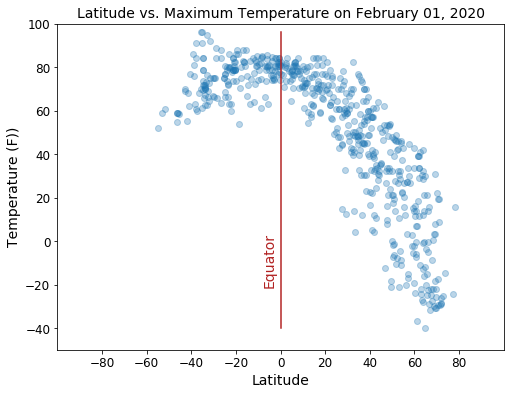

In [49]:
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Latitude vs. Maximum Temperature on ' + date.today().strftime('%B %d, %Y'), fontsize = 14);
ax1.set_xlabel('Latitude', fontsize = 14)
ax1.set_ylabel('Temperature (F))', fontsize = 14);
ax1.scatter(weather_df['Latitude'], weather_df['Max Temp'], alpha = 0.3);
# ax1.plot(mean_GDP_over_time.drop(['Latitude','Longitude']));
# ax1.plot([weather_df['Max Temp'].min(), weather_df['Max Temp'].max()],color = 'firebrick')
# ax1.plot([48],[mean_GDP_over_time['2018']],'o')
# ax1.plot([30],[mean_GDP_over_time['2000']],'o', color = 'salmon')
# ax1.plot([0],[mean_GDP_over_time['1970']],'o', color='gray')
xticks_values = [_ for _ in range(-100,120,20)];
ax1.set_xticks(xticks_values[1:len(xticks_values)-1]);
ax1.set_xlim([-100,100]);
ax1.set_ylim([-50,100]);
# ax1.annotate(f'US$ {round(mean_GDP_over_time["1970"], 2)} \nin 1970', \
#              xy=(-1, mean_GDP_over_time['1970']*2.25), fontsize = 12, color='gray')
ax1.plot([0,0],[weather_df['Max Temp'].min(), weather_df['Max Temp'].max()],color = 'firebrick')
ax1.annotate('Equator', (-8,-20), fontsize = 14, color = 'firebrick', rotation = 90)


# ax1.annotate('US$ 16.6B \nin 2000', xy=(30-4, mean_GDP_over_time['2000']+2), fontsize = 12, color='black')
ax1.tick_params(axis='both', which='major', labelsize=12)
# ax1.legend('Test', loc='right')

# plt.savefig("Images/MeanGDP_over_time.png", bbox_inches = 'tight', pad_inches = 1.0)
plt.show()

# plt.scatter(weather_df['Latitude'], weather_df['Max Temp'], alpha = 0.3);
# plt.xlim(range_of_latitude)
# plt.title('Latitude vs. Maximum Temperature on ' + date.today().strftime('%B %d, %Y'));
# plt.xlabel('Latitude')
# plt.ylabel('Maximum Temperature (F)')
# plt.plot([0,0],[weather_df['Max Temp'].min(), weather_df['Max Temp'].max()],color = 'firebrick')
# plt.annotate('Equator', (-10,-20), fontsize = 14, color = 'firebrick', rotation = 90)
# plt.show()